# Hashtag Analysis: Statistics, Text Mining, and Sentiment Analysis on a Car Race

### Task

Reaching and graphically visualizing/categorizing the details of the hashtags 

Text Mining: Finding and visualizing most frequent words of #GEICO500 on car race cup 

Sentiment analysis of the tweets in #GEICO500

### Importing Necessary Libraries

In [1]:
import tweepy, codecs
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word, TextBlob
#nltk.download('wordnet')
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Getting Rid of Filter Warnings

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Prerequisite

For performing the following analyses, one must have at least an autorized **"Developer Account"** on twitter with **"Elevated"** access.

To open a developer acoount, visit:

https://developer.twitter.com/

### API Connection

Enter the following keys constructed for the project on your Developer Account.

In [3]:
api_key = ' '
api_key_secret = ' '
access_token = ' '
access_token_secret = ' '

In [4]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Reaching Available Trends in a Certain Place

In [5]:
api.available_trends()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

Reaching trends with city/country IDs:

In [6]:
def place_ID():
    places = api.available_trends()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [7]:
place_ID()

{'worldwide': 1,
 'winnipeg': 2972,
 'ottawa': 3369,
 'quebec': 3444,
 'montreal': 3534,
 'toronto': 4118,
 'edmonton': 8676,
 'calgary': 8775,
 'vancouver': 9807,
 'birmingham': 2364559,
 'blackpool': 12903,
 'bournemouth': 13383,
 'brighton': 13911,
 'bristol': 13963,
 'cardiff': 15127,
 'coventry': 17044,
 'derby': 18114,
 'edinburgh': 19344,
 'glasgow': 21125,
 'hull': 25211,
 'leeds': 26042,
 'leicester': 26062,
 'liverpool': 26734,
 'manchester': 28218,
 'middlesbrough': 28869,
 'newcastle': 30079,
 'nottingham': 30720,
 'plymouth': 32185,
 'portsmouth': 32452,
 'preston': 32566,
 'sheffield': 34503,
 'stoke-on-trent': 36240,
 'swansea': 36758,
 'london': 44418,
 'belfast': 44544,
 'santo domingo': 76456,
 'guatemala city': 83123,
 'acapulco': 110978,
 'aguascalientes': 111579,
 'chihuahua': 115958,
 'mexico city': 116545,
 'ciudad juarez': 116556,
 'nezahualcóyotl': 116564,
 'culiacán': 117994,
 'ecatepec de morelos': 118466,
 'guadalajara': 124162,
 'hermosillo': 124785,
 'león

Reaching city/country ID with its name:

In [8]:
def place_woeid(place_name):
    place_name = place_name.lower()
    trends = api.available_trends()
    all_woeids = place_ID()
    return all_woeids[place_name]

In [9]:
place_woeid("united states")

23424977

In [10]:
trends = api.get_place_trends(id = 23424977)

In [11]:
print(json.dumps(trends, indent = 3))

[
   {
      "trends": [
         {
            "name": "Elon",
            "url": "http://twitter.com/search?q=Elon",
            "promoted_content": null,
            "query": "Elon",
            "tweet_volume": 1691858
         },
         {
            "name": "#TwitterTakeover",
            "url": "http://twitter.com/search?q=%23TwitterTakeover",
            "promoted_content": null,
            "query": "%23TwitterTakeover",
            "tweet_volume": 42913
         },
         {
            "name": "Tesla",
            "url": "http://twitter.com/search?q=Tesla",
            "promoted_content": null,
            "query": "Tesla",
            "tweet_volume": 201322
         },
         {
            "name": "#FreeSpeech",
            "url": "http://twitter.com/search?q=%23FreeSpeech",
            "promoted_content": null,
            "query": "%23FreeSpeech",
            "tweet_volume": 16245
         },
         {
            "name": "Tumblr",
            "url": "http://twitter.

For a simpler output, calling only trend names:

In [12]:
trends_usa = trends[0]["trends"]
for i in trends_usa:
    print(i["name"])

Elon
#TwitterTakeover
Tesla
#FreeSpeech
Tumblr
Truth Social
#twittersold
Canada
MySpace
Mastodon
Marshall Law
Weverse
Bezos
#ByeTwitter
Counter Social
I NEVER LIKED YOU
$44 Billion
Omarion
Washington Post
Bob Newhart
Twitter for $44
Donald Trump
Discord
#dogecoin
Black Twitter
Zuckerberg
Twitter HQ
African-American
MATZ
Jack Dorsey
Babylon Bee
Parler
Shaun King
Rick Perry
South Africa
SpaceX
Stelter
Section 230
App Store
Edit
Bye Felicia
Alex Jones
Lea Michele
Tony Stark
Reddit
Grimes
Misinformation
Masters Degree
Billionaires
Twitter CEO


### Extracting Data From a Hashtag

In [13]:
tweets = api.search_tweets(q = "#GEICO500", 
                      lang = "en", 
                      result_type = "recent", 
                     count = 1000)

We request "recent" tweets. The "popular" and "mix" types can be also called.

In [14]:
def hashtag_df(tweets):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweets]
    df = pd.DataFrame(id_list, columns = ["id"])
    df["text"] = [tweet.text for tweet in tweets]
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["source"] = [tweet.source for tweet in tweets]
    df["retweeted"] = [tweet.retweeted for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweets]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweets]
    df["user_location"] = [tweet.author.location for tweet in tweets]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweets]
    return df

In [15]:
df = hashtag_df(tweets)
df

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1518718225252372480,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:26:55+00:00,Twitter for iPhone,False,34,18rowdy_nation,2609,"Altamonte Springs, FL","[{'text': 'GEICO500', 'indices': [59, 68]}, {'..."
1,1518717978484817946,RT @Gato_Libre37: One year ago to the day @kes...,2022-04-25 22:25:57+00:00,Twitter for iPhone,False,1,diecast_b,5342,"Concord, NC","[{'text': 'Geico500', 'indices': [62, 71]}]"
2,1518717811203485697,One year ago to the day @keselowski won the #G...,2022-04-25 22:25:17+00:00,Twitter for iPhone,False,1,Gato_Libre37,159,"Brick, NJ","[{'text': 'Geico500', 'indices': [44, 53]}]"
3,1518717631548825602,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:24:34+00:00,Twitter for Android,False,34,zmyers23,228,,"[{'text': 'GEICO500', 'indices': [59, 68]}, {'..."
4,1518716960623710210,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:21:54+00:00,Twitter for iPhone,False,34,HaleyMitchell6,523,"Munford, Alabama","[{'text': 'GEICO500', 'indices': [59, 68]}, {'..."
...,...,...,...,...,...,...,...,...,...,...
95,1518678858655956992,RT @BeardOil62: The 🏁 has waved at @Talladega!...,2022-04-25 19:50:30+00:00,Twitter for Android,False,40,Ty_Grieve29,405,"Grants, NM","[{'text': 'NASCAR', 'indices': [117, 124]}, {'..."
96,1518678481353285633,"Live from @TALLADEGA, it’s the #GEICO500! Grea...",2022-04-25 19:49:00+00:00,Twitter for iPhone,False,0,scoutsande,1230,New York City,"[{'text': 'GEICO500', 'indices': [31, 40]}]"
97,1518678123121987584,2. Backed that up by listening to @chriswilner...,2022-04-25 19:47:34+00:00,Twitter Web App,False,0,JamesVPike,1422,"Charlotte, NC","[{'text': 'GEICO500', 'indices': [86, 95]}]"
98,1518677886156394497,RT @lalamoore_8: 1st a hug 🤗 now a picture wit...,2022-04-25 19:46:38+00:00,Twitter for Android,False,18,The3rdRavenlll,449,,"[{'text': 'Dega', 'indices': [84, 89]}, {'text..."


### Describing a Hashtag

**The number of unique contributors:**

In [16]:
df["user_screen_name"].unique().size

76

In [17]:
df.groupby("user_screen_name")["id"].count().sum()

100

89 out of 100 contributions are unique.

**Top Contributors**

In [18]:
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:10]

user_screen_name
Ty_Grieve29        23
AbbyLyneClardy      3
18rowdy_nation      1
ThankVolta          1
alex_dockery97      1
WillieRoyH          1
Twitch3890          1
TheRealMaxMan05     1
TheDogSaint         1
The3rdRavenlll      1
Name: id, dtype: int64

**Original (Non-retweet) Contributions**

In [19]:
df[~df["text"].str.startswith("RT")].head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
2,1518717811203485697,One year ago to the day @keselowski won the #G...,2022-04-25 22:25:17+00:00,Twitter for iPhone,False,1,Gato_Libre37,159,"Brick, NJ","[{'text': 'Geico500', 'indices': [44, 53]}]"
7,1518715984290455553,Imagine driving home and thinking\n“Aw damn we...,2022-04-25 22:18:01+00:00,Twitter for iPhone,False,0,TheRealMaxMan05,843,"Georgia, USA","[{'text': 'NASCAR', 'indices': [105, 112]}]"
8,1518715876228296704,#NASCAR #GEICO500 \nApril 24 post race intervi...,2022-04-25 22:17:35+00:00,TweetDeck,False,0,asapsports,6561,Wherever you need us!,"[{'text': 'NASCAR', 'indices': [0, 7]}, {'text..."
31,1518706565808799751,@dennyhamlin is todays @Kenny_Wallace and need...,2022-04-25 21:40:36+00:00,Twitter for iPhone,False,0,Sammie54361,393,,[]
32,1518706163373772800,Missed the wild finish to the #Geico500? \n\nC...,2022-04-25 21:39:00+00:00,TweetDeck,False,0,GoTrackHopper,366,Racetracks Everywhere,"[{'text': 'Geico500', 'indices': [30, 39]}, {'..."


The number of original contributions:

In [20]:
df[~df["text"].str.startswith("RT")].count()["id"]

12

The rate of the original contributions wrt. the number of all tweets in the hashtag: 

In [21]:
df[~df["text"].str.startswith("RT")].count()["id"] / len(df)

0.12

The rate of the original contributions wrt. the number of retweets: 

In [22]:
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]

0.13636363636363635

The most retweeted:

In [23]:
df.sort_values("retweet_count", ascending = False).head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
99,1518677645139009538,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 19:45:40+00:00,Twitter for Android,False,645,WillieRoyH,36,"Alabama, USA","[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
62,1518687970420838401,RT @TALLADEGA: 🚨 RETWEET TO WIN 🚨\n \nOne luck...,2022-04-25 20:26:42+00:00,Twitter for iPhone,False,645,slucas4367,31,"Colorado, USA","[{'text': 'GEICO500', 'indices': [84, 93]}, {'..."
75,1518680170122469377,RT @ClearTwenty8: To celebrate @NoahGragson an...,2022-04-25 19:55:42+00:00,Twitter for Android,False,361,Ty_Grieve29,405,"Grants, NM",[]
72,1518680280017424384,RT @NoahGragson: Excited to announce my new pa...,2022-04-25 19:56:09+00:00,Twitter for Android,False,200,Ty_Grieve29,405,"Grants, NM","[{'text': 'GEICO500', 'indices': [88, 97]}]"
51,1518695802511757316,RT @BlueEmu1: Which NASCAR Cup Series driver o...,2022-04-25 20:57:49+00:00,Twitter Web App,False,102,OfficeDealsG,719,Arkansas,[]


**Day-Time Analysis of the Tweets**

In [24]:
df["tweet_time"] = df["created_at"].apply(lambda x: x.strftime("%H"))
df["tweet_time"] = pd.to_numeric(df["tweet_time"])

df["day"] = df["created_at"].dt.day_name()

df.head()

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time,day
0,1518718225252372480,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:26:55+00:00,Twitter for iPhone,False,34,18rowdy_nation,2609,"Altamonte Springs, FL","[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday
1,1518717978484817946,RT @Gato_Libre37: One year ago to the day @kes...,2022-04-25 22:25:57+00:00,Twitter for iPhone,False,1,diecast_b,5342,"Concord, NC","[{'text': 'Geico500', 'indices': [62, 71]}]",22,Monday
2,1518717811203485697,One year ago to the day @keselowski won the #G...,2022-04-25 22:25:17+00:00,Twitter for iPhone,False,1,Gato_Libre37,159,"Brick, NJ","[{'text': 'Geico500', 'indices': [44, 53]}]",22,Monday
3,1518717631548825602,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:24:34+00:00,Twitter for Android,False,34,zmyers23,228,,"[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday
4,1518716960623710210,RT @TALLADEGA: 👇 Taking center stage 👇\n\n𝙇𝙚𝙛𝙩...,2022-04-25 22:21:54+00:00,Twitter for iPhone,False,34,HaleyMitchell6,523,"Munford, Alabama","[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday


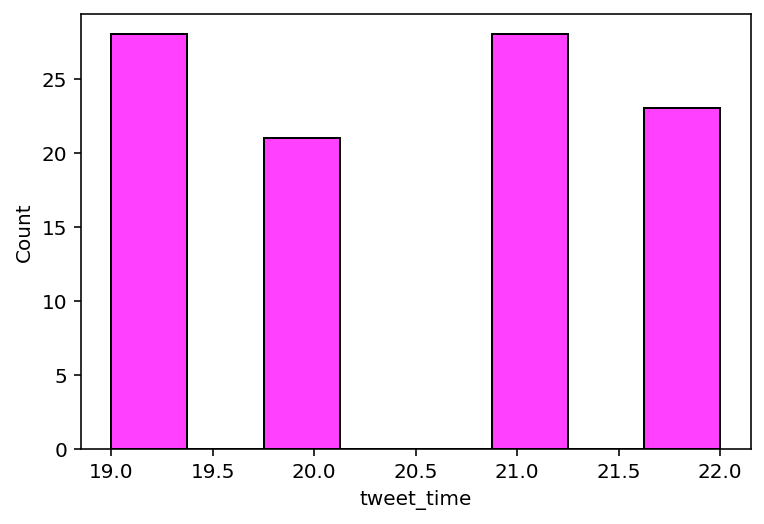

In [25]:
sns.histplot(df["tweet_time"], kde = False, color = "magenta");

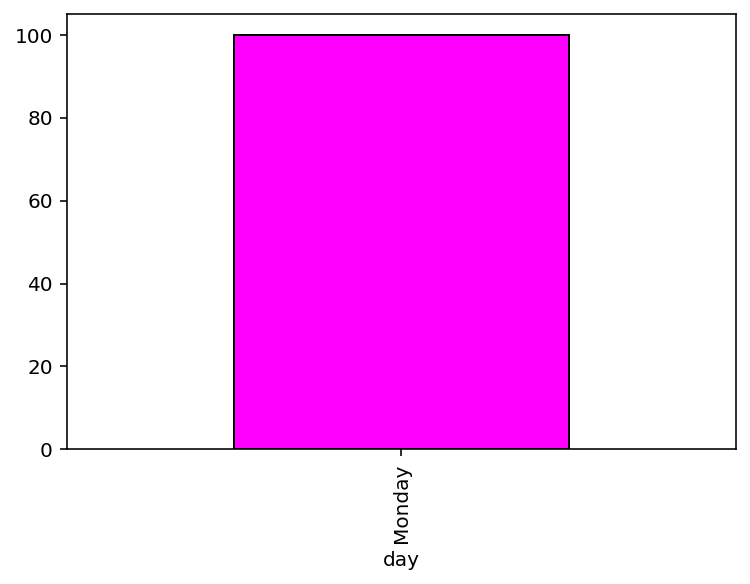

In [26]:
day_freq = df.groupby("day").count()["id"]
day_freq.plot.bar(x = "day", y = "id",color = "magenta", edgecolor="black");

We requested "recent" tweets. Therefore, they all belong to a single day. 

**Tweet Sending Platforms**

In [27]:
df.groupby("source").count()["id"]

source
Sprout Social           1
TweetDeck               2
Twitter Web App         9
Twitter for Android    44
Twitter for iPhone     44
Name: id, dtype: int64

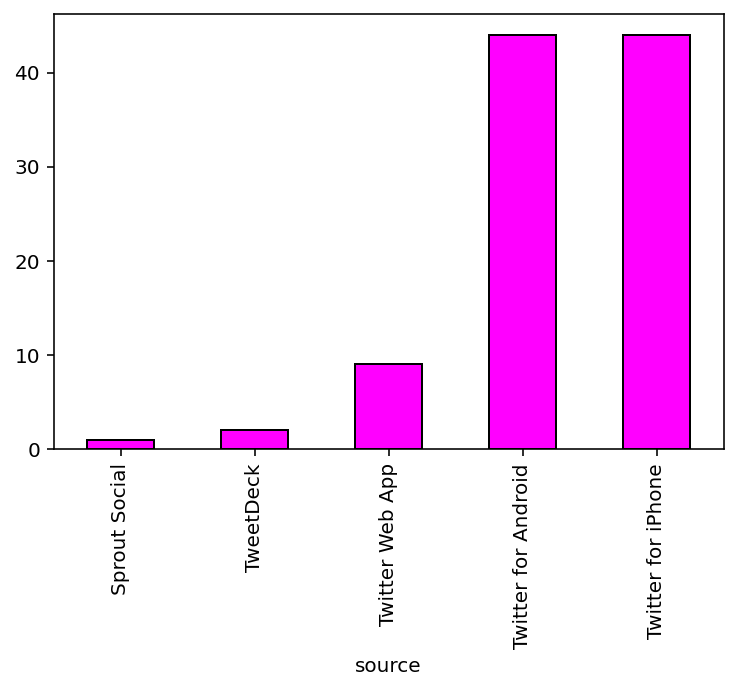

In [28]:
platform_freq = df.groupby("source").count()["id"]
platform_freq.plot.bar(x = "source", y = "id", color = "magenta", edgecolor="black");

### Text Mining

**Getting the Terms and their Frequencies**

In [29]:
# Upper-Lower Transformatiom
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

# Numbers
df['text'] = df['text'].str.replace('\d','')

# Stopwords 
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

# lemmatization

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

# Removing one- and two-letter entries
df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if len(x) > 2))

In [30]:
df["text"]

0     talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...
1     gato_libre one year ago day keselowski geico t...
2     one year ago day keselowski geico today got ra...
3     talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...
4     talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...
                            ...                        
95    beardoil waved talladega noahgragson finish we...
96    live talladega geico great work team coordinat...
97    backed listening chriswilners cup debut mrnrad...
98    lalamoore_ hug picture man thank dalejr dega g...
99    talladega retweet win one lucky fan could rece...
Name: text, Length: 100, dtype: object

In [31]:
df_tf= df["text"].str.split(" ", expand=True).melt()['value'].value_counts().reset_index()
df_tf.columns= ["word", "tf"]
df_tf

,word,tf
0,geico,84
1,talladega,64
2,stage,36
3,agpro,34
4,taking,33
...,...,...
302,gato_libre,1
303,debut,1
304,left,1
305,interview,1


**Plotting the Most Frequent Terms**

The most frequent words, measured here as having frequency larger than mean value plus std deviation:

In [32]:
most_freq = df_tf[df_tf.tf > df_tf.tf.mean() + df_tf.tf.std()]
most_freq

,word,tf
0,geico,84
1,talladega,64
2,stage,36
3,agpro,34
4,taking,33
5,generaltire,32
6,httpstcolfchjbnrq,32
7,𝘽𝙚𝙝𝙞𝙣𝙙,32
8,𝙇𝙚𝙛𝙩,32
9,center,32


Plot of the most frequent words:

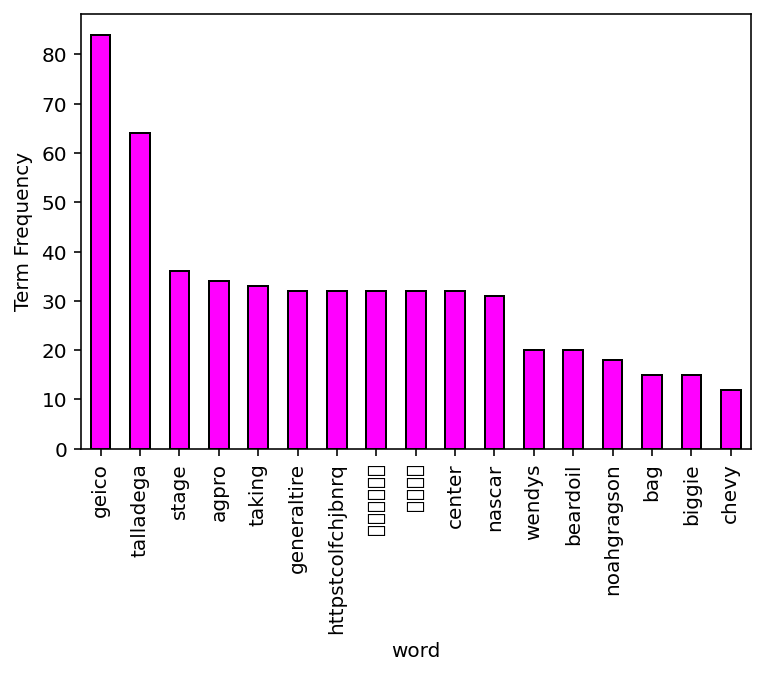

In [33]:
most_freq.plot.bar(x = "word",y = "tf",ylabel = "Term Frequency", legend = None,color = "magenta", edgecolor="black");

**Word Cloud**

Joining all terms:

In [34]:
text = " ".join(i for i in df.text)
text

'talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq gato_libre one year ago day keselowski geico today got race win diecast_b another brad fordperf one year ago day keselowski geico today got race win diecast_b another brad httpstcoayfxvbpa talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq imagine driving home thinking damn left couch behind like forget couch nascar httpstcozkpctsnv nascar geico april post race interview transcript httpstcoftfhmwmip ross chastain winner phil httpstcowecrpjok talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geico agpro generaltire httpstcolfchjbnrq talladega taking

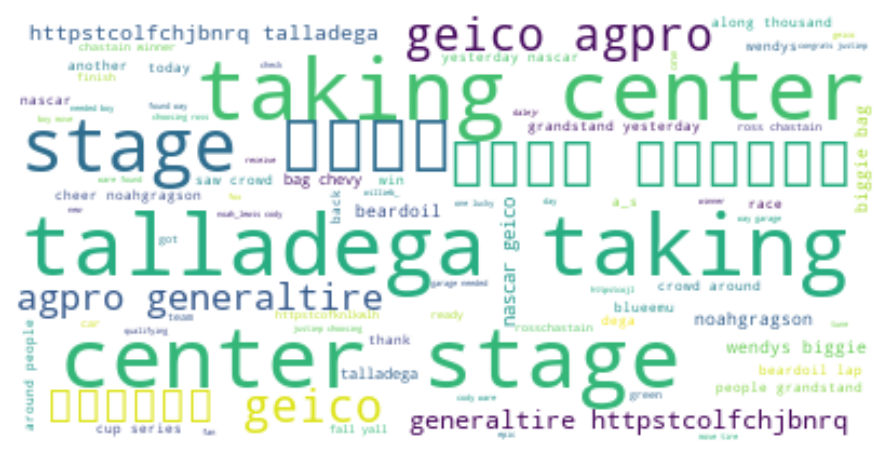

In [35]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Word Cloud on a Template:

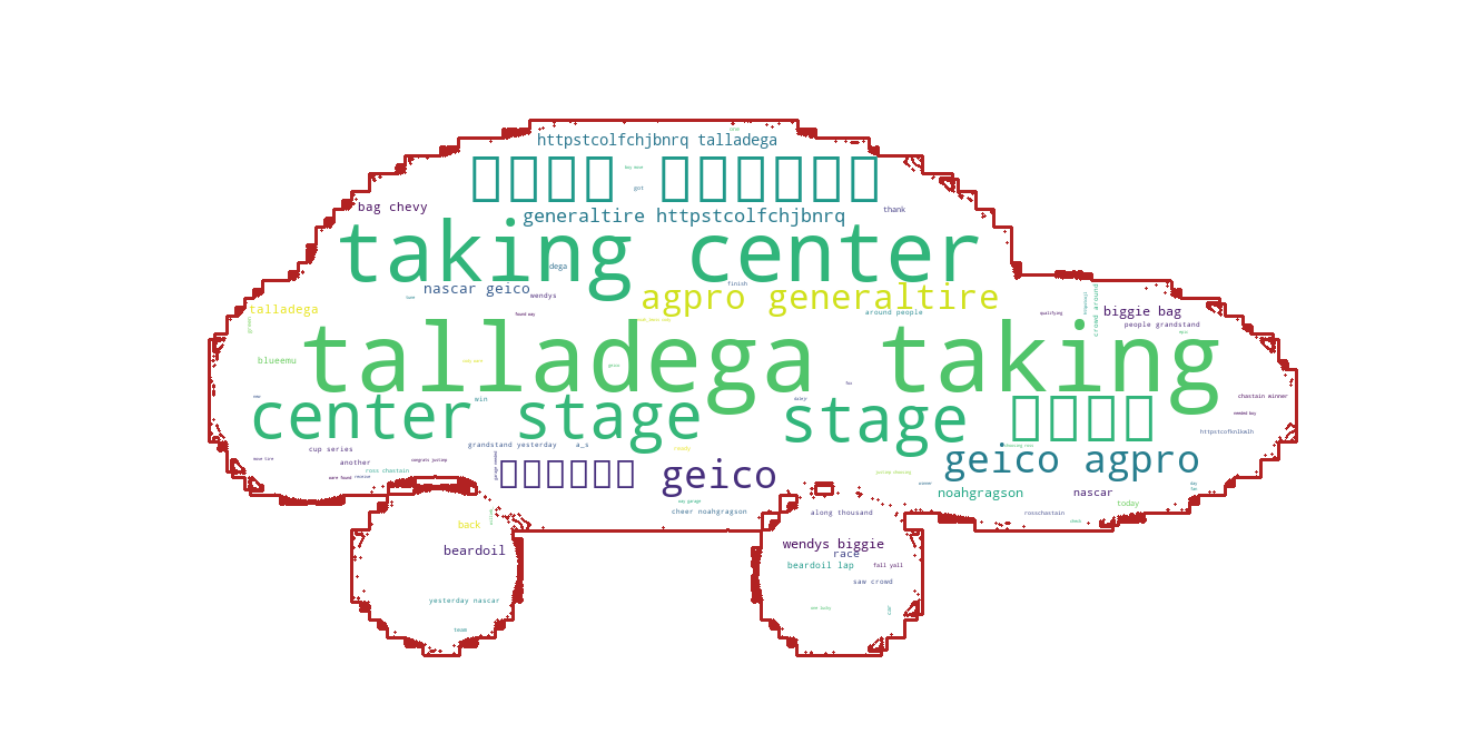

In [36]:
geico_mask = np.array(Image.open("CAR.jpg"))

wc = WordCloud(background_color = "white", 
              max_words = 1000, 
              mask = geico_mask,
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Sentiment Analysis

In [37]:
def sentiment_score(df):
    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_score = textB.sentiment.polarity
        df.at[i, 'sentiment_score']=sentiment_score

        if sentiment_score <0.00:
            emotion_class = 'Negative'
            df.at[i, 'emotion_class']=emotion_class

        elif sentiment_score >0.00:
            emotion_class = 'Pozitive'
            df.at[i, 'emotion_class']=emotion_class

        else:
            emotion_class = 'Neutral'
            df.at[i, 'emotion_class']=emotion_class
            
    return df 

In [38]:
sentiment_score(df)

,id,text,created_at,source,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,tweet_time,day,sentiment_score,emotion_class
0,1518718225252372480,talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...,2022-04-25 22:26:55+00:00,Twitter for iPhone,False,34,18rowdy_nation,2609,"Altamonte Springs, FL","[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday,-0.100000,Negative
1,1518717978484817946,gato_libre one year ago day keselowski geico t...,2022-04-25 22:25:57+00:00,Twitter for iPhone,False,1,diecast_b,5342,"Concord, NC","[{'text': 'Geico500', 'indices': [62, 71]}]",22,Monday,0.800000,Pozitive
2,1518717811203485697,one year ago day keselowski geico today got ra...,2022-04-25 22:25:17+00:00,Twitter for iPhone,False,1,Gato_Libre37,159,"Brick, NJ","[{'text': 'Geico500', 'indices': [44, 53]}]",22,Monday,0.800000,Pozitive
3,1518717631548825602,talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...,2022-04-25 22:24:34+00:00,Twitter for Android,False,34,zmyers23,228,,"[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday,-0.100000,Negative
4,1518716960623710210,talladega taking center stage 𝙇𝙚𝙛𝙩 𝘽𝙚𝙝𝙞𝙣𝙙 geic...,2022-04-25 22:21:54+00:00,Twitter for iPhone,False,34,HaleyMitchell6,523,"Munford, Alabama","[{'text': 'GEICO500', 'indices': [59, 68]}, {'...",22,Monday,-0.100000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1518678858655956992,beardoil waved talladega noahgragson finish we...,2022-04-25 19:50:30+00:00,Twitter for Android,False,40,Ty_Grieve29,405,"Grants, NM","[{'text': 'NASCAR', 'indices': [117, 124]}, {'...",19,Monday,0.000000,Neutral
96,1518678481353285633,live talladega geico great work team coordinat...,2022-04-25 19:49:00+00:00,Twitter for iPhone,False,0,scoutsande,1230,New York City,"[{'text': 'GEICO500', 'indices': [31, 40]}]",19,Monday,0.562121,Pozitive
97,1518678123121987584,backed listening chriswilners cup debut mrnrad...,2022-04-25 19:47:34+00:00,Twitter Web App,False,0,JamesVPike,1422,"Charlotte, NC","[{'text': 'GEICO500', 'indices': [86, 95]}]",19,Monday,0.000000,Neutral
98,1518677886156394497,lalamoore_ hug picture man thank dalejr dega g...,2022-04-25 19:46:38+00:00,Twitter for Android,False,18,The3rdRavenlll,449,,"[{'text': 'Dega', 'indices': [84, 89]}, {'text...",19,Monday,0.000000,Neutral


In [39]:
df.groupby("emotion_class").count()["id"]

emotion_class
Negative    40
Neutral     36
Pozitive    24
Name: id, dtype: int64

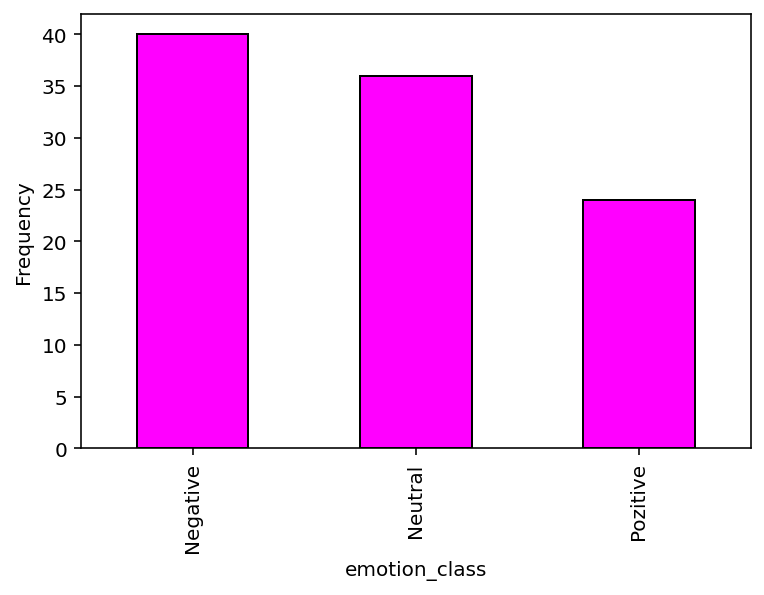

In [40]:
emotion_freq = df.groupby("emotion_class").count()["id"]
emotion_freq.plot.bar(x = "emotion_class",y = "id", ylabel = "Frequency",color="magenta", edgecolor="black");